In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler

Data source: MAGIC Gamma Telescope.
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "Class"]
magicDF = pd.read_csv("magic04.data", names=cols)
magicDF.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist Class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
magicDF['Class'].unique()

array(['g', 'h'], dtype=object)

Class "g" stands for Gamma while "h" stands for Hadrons.
Those will be converted into 1 and 0, respectively, for better data manipulation

In [4]:
magicDF["Class"] = (magicDF["Class"] == 'g').astype(int)

In [5]:
magicDF.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  Class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

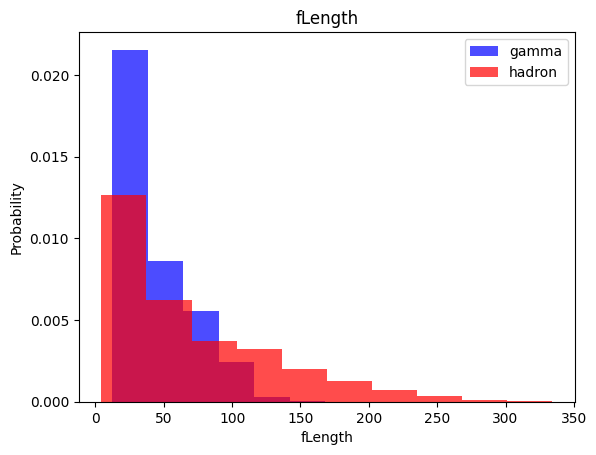

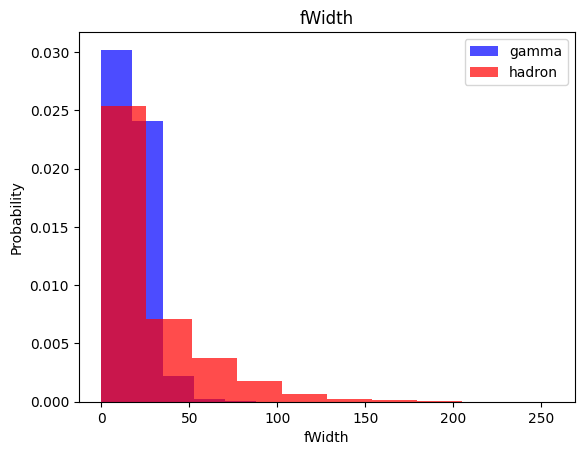

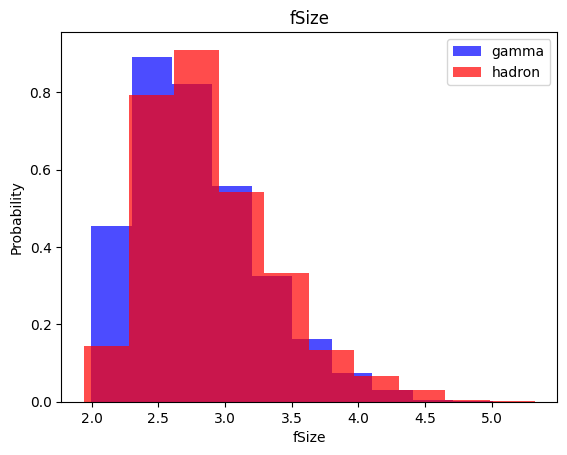

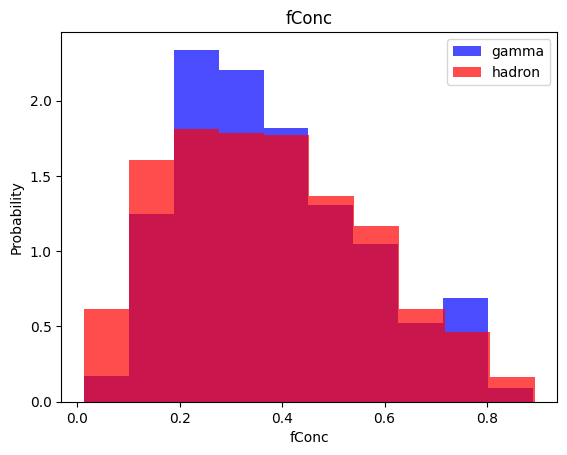

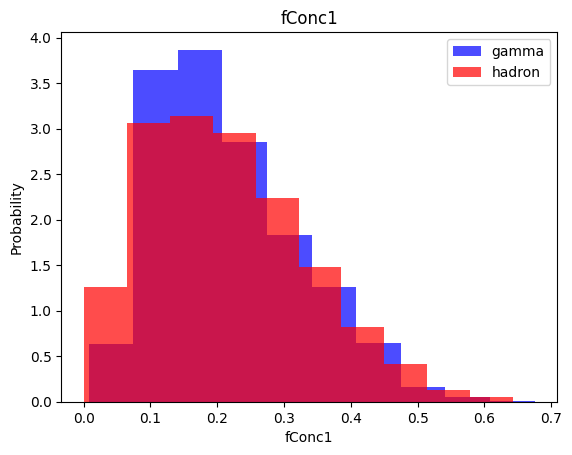

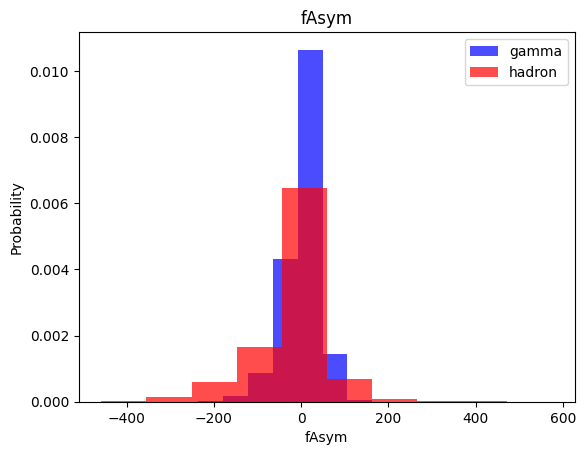

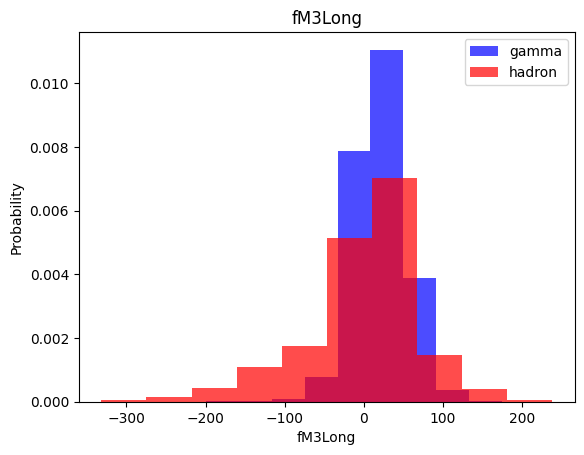

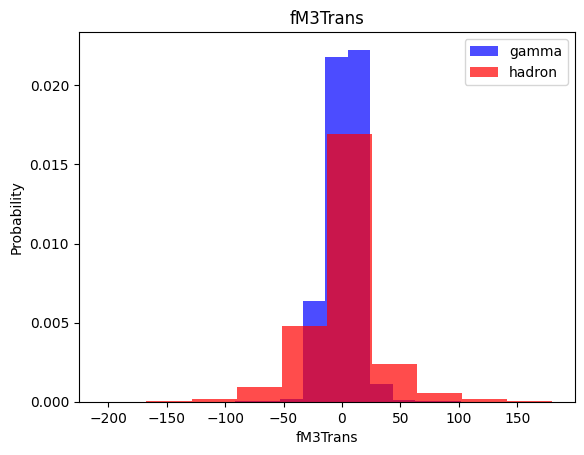

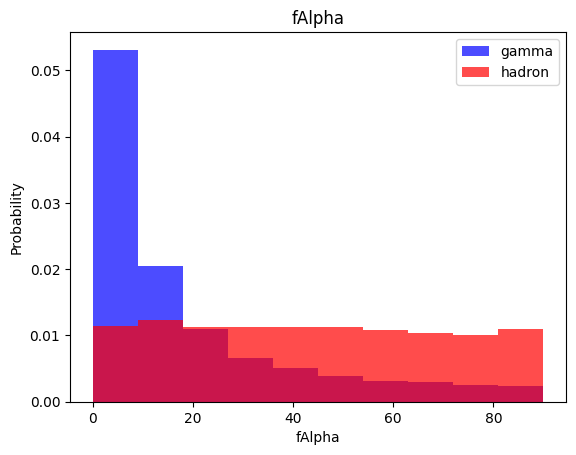

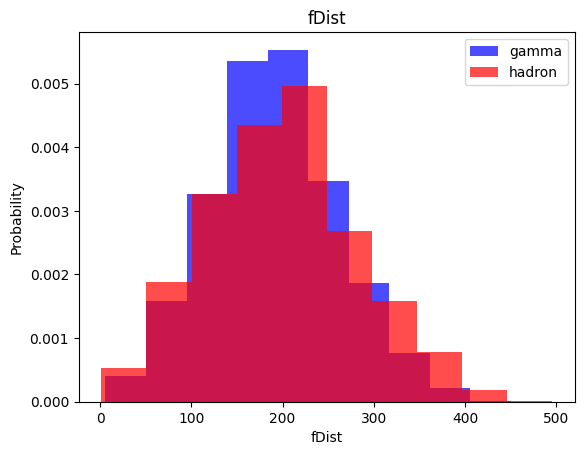

In [6]:
for label in cols[:-1]:
    plt.hist(magicDF[magicDF['Class']==1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(magicDF[magicDF['Class']==0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

Above we see minor distorcions between both classes, especially in the tails. Hoowever, we see a strong connection between fAlpha distribution and class distribution.

Creating Train, Validation and Test datasets

In [7]:
train, valid, test = np.split(magicDF.sample(frac=1), [int(0.6*len(magicDF)), int(0.8*len(magicDF))])

In [8]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_predictions = knn_model.predict(X_test)

In [13]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1295
           1       0.85      0.89      0.87      2509

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [16]:
y_predictions = nb_model.predict(X_test)

In [17]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.65      0.40      0.50      1295
           1       0.74      0.89      0.81      2509

    accuracy                           0.72      3804
   macro avg       0.69      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Log Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

In [20]:
y_predictions = lr_model.predict(X_test)

In [21]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1295
           1       0.85      0.82      0.83      2509

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804



# SVM

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_predictions = svm_model.predict(X_test)

In [25]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1295
           1       0.90      0.89      0.90      2509

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [34]:
import tensorflow as tf

In [35]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [36]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
            tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(num_nodes, activation='relu'),
            tf.keras.layers.Dropout(dropout_prob),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 0)

    return nn_model, history

Nodes: 16, dropout: 0, learning rate: 0.01, batch size: 32, epochs: 100 


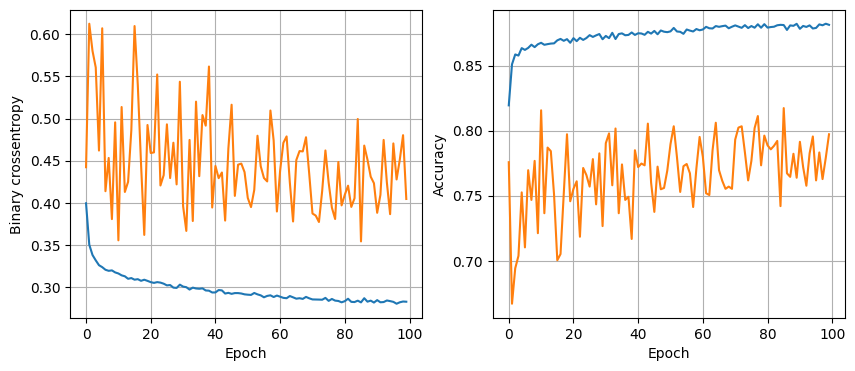

119/119 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8649
Nodes: 16, dropout: 0, learning rate: 0.01, batch size: 64, epochs: 100 


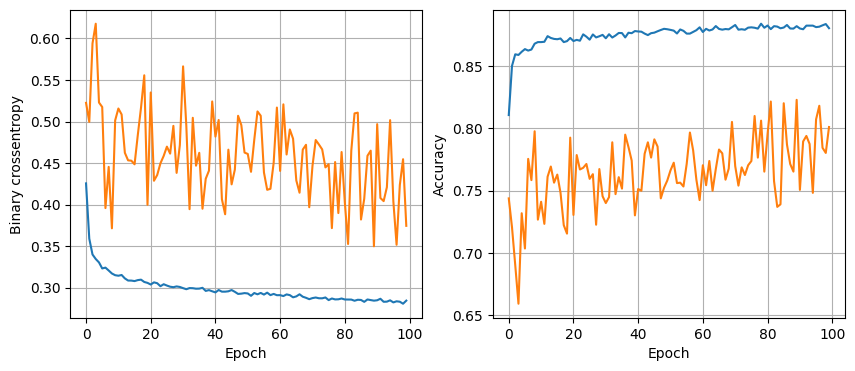

119/119 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8688
Nodes: 16, dropout: 0, learning rate: 0.01, batch size: 128, epochs: 100 


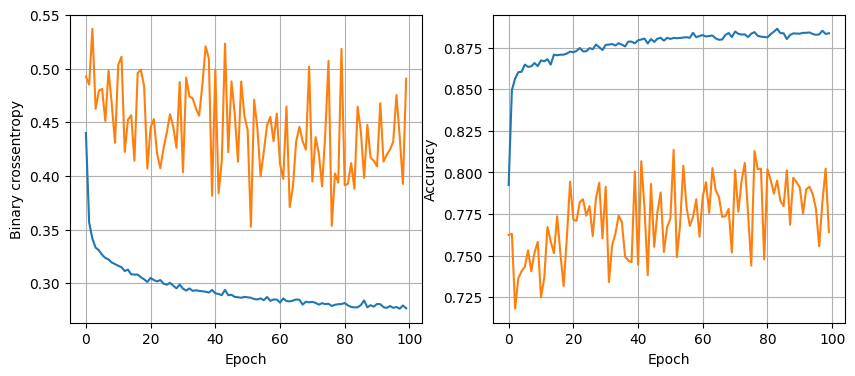

119/119 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8720
Nodes: 16, dropout: 0, learning rate: 0.005, batch size: 32, epochs: 100 


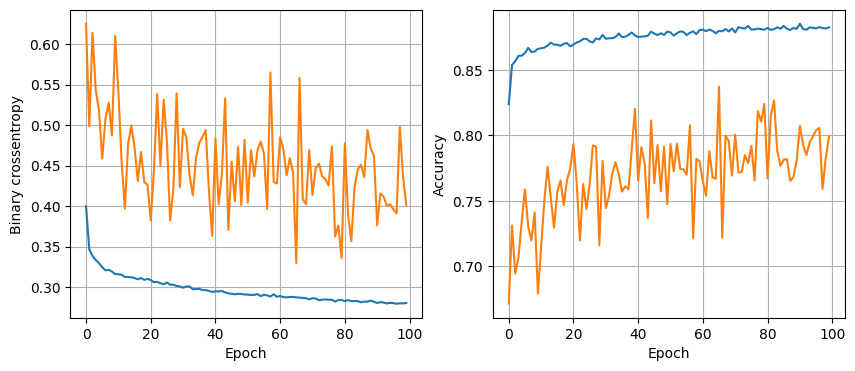

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8704
Nodes: 16, dropout: 0, learning rate: 0.005, batch size: 64, epochs: 100 


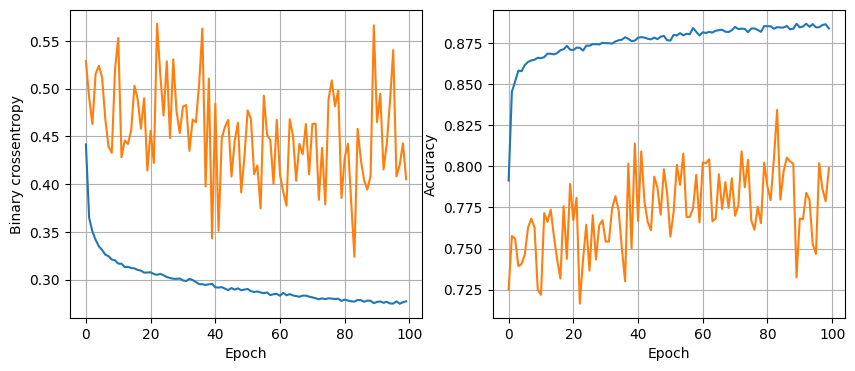

119/119 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8717
Nodes: 16, dropout: 0, learning rate: 0.005, batch size: 128, epochs: 100 


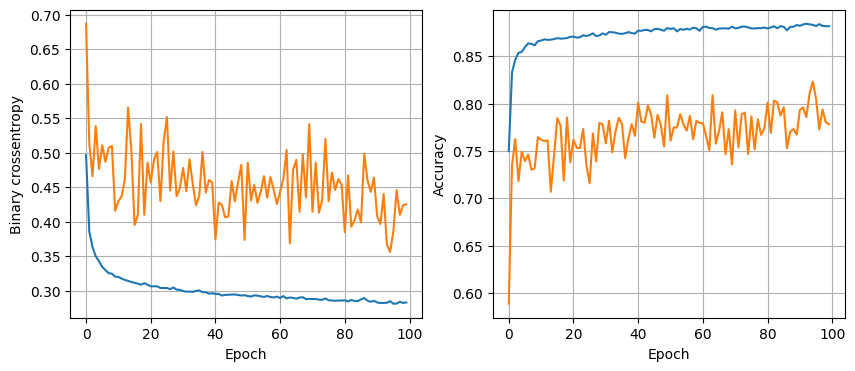

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8688
Nodes: 16, dropout: 0, learning rate: 0.001, batch size: 32, epochs: 100 


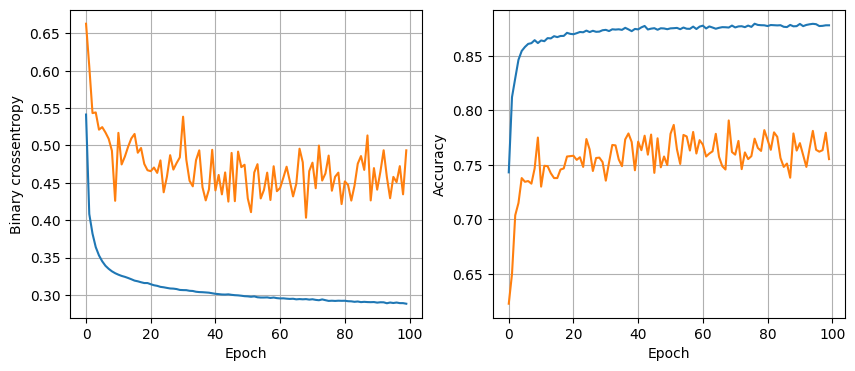

119/119 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8736
Nodes: 16, dropout: 0, learning rate: 0.001, batch size: 64, epochs: 100 


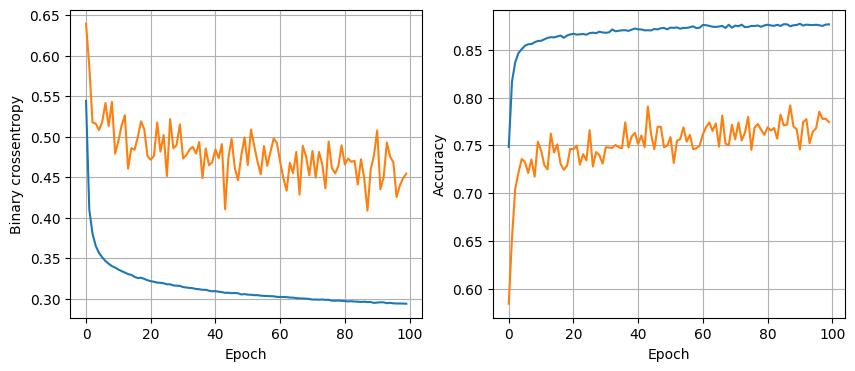

119/119 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8717
Nodes: 16, dropout: 0, learning rate: 0.001, batch size: 128, epochs: 100 


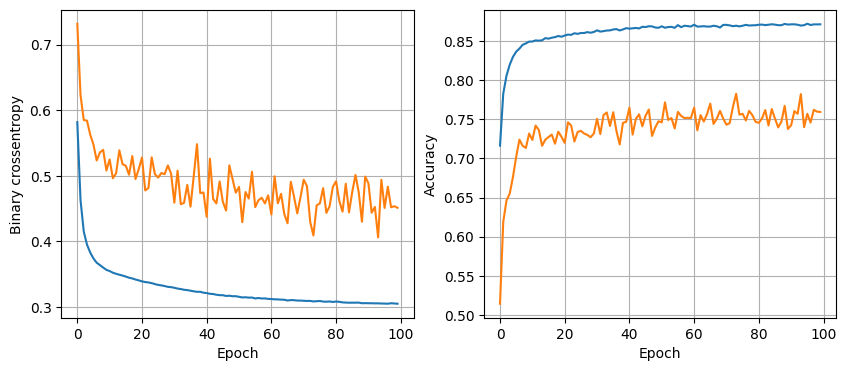

119/119 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8712
Nodes: 16, dropout: 0.2, learning rate: 0.01, batch size: 32, epochs: 100 


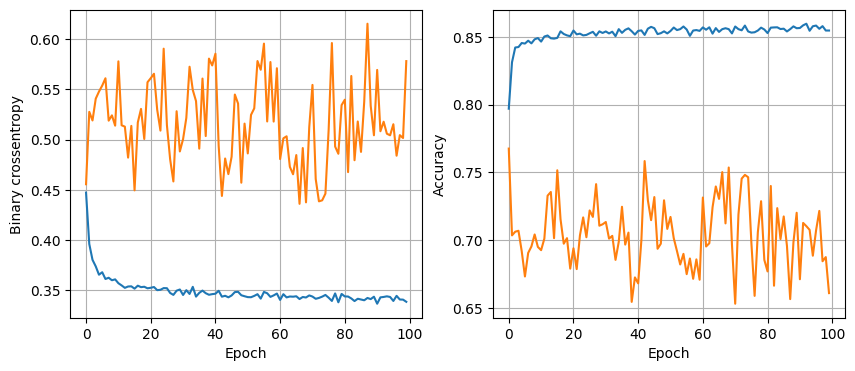

119/119 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8570
Nodes: 16, dropout: 0.2, learning rate: 0.01, batch size: 64, epochs: 100 


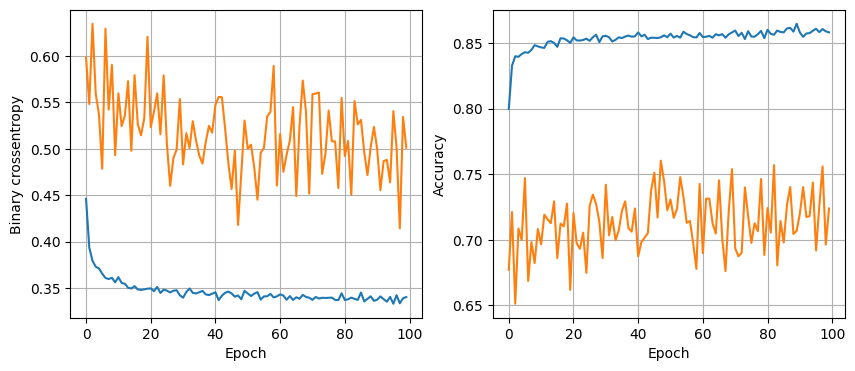

119/119 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8701
Nodes: 16, dropout: 0.2, learning rate: 0.01, batch size: 128, epochs: 100 


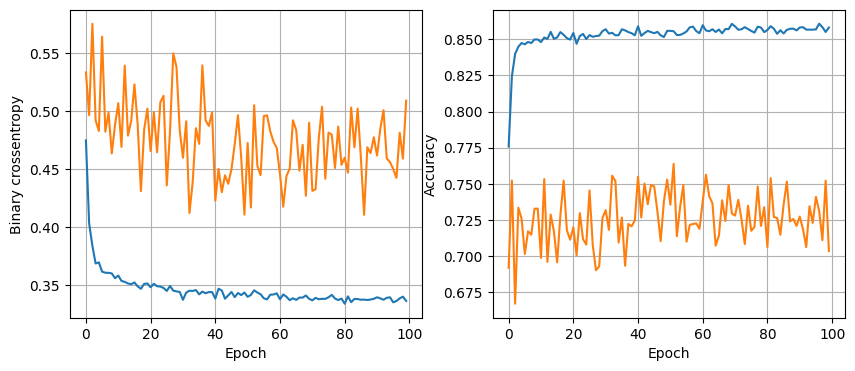

119/119 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8644
Nodes: 16, dropout: 0.2, learning rate: 0.005, batch size: 32, epochs: 100 


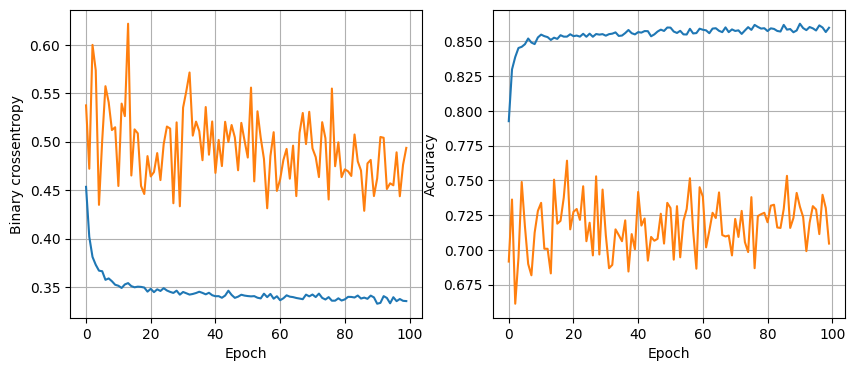

119/119 [==============================] - 0s 1ms/step - loss: 0.3229 - accuracy: 0.8651
Nodes: 16, dropout: 0.2, learning rate: 0.005, batch size: 64, epochs: 100 


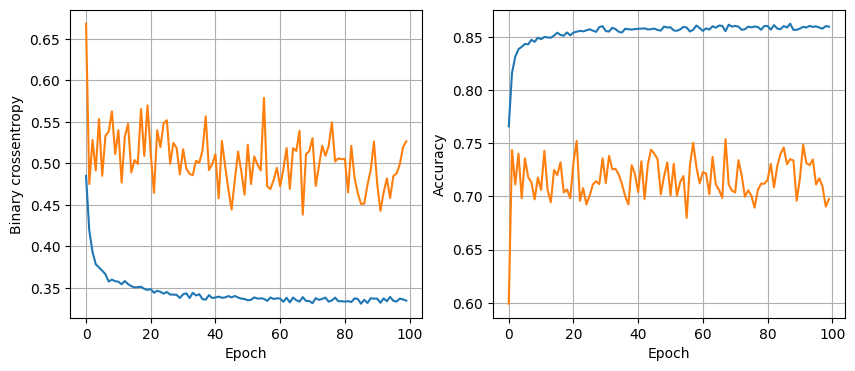

119/119 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8725
Nodes: 16, dropout: 0.2, learning rate: 0.005, batch size: 128, epochs: 100 


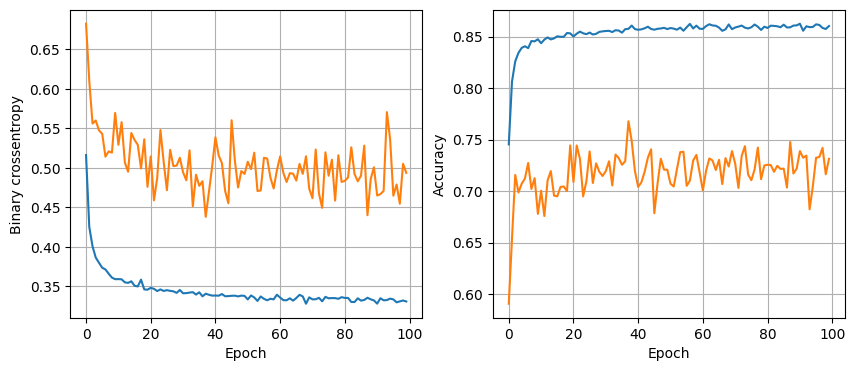

119/119 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8704
Nodes: 16, dropout: 0.2, learning rate: 0.001, batch size: 32, epochs: 100 


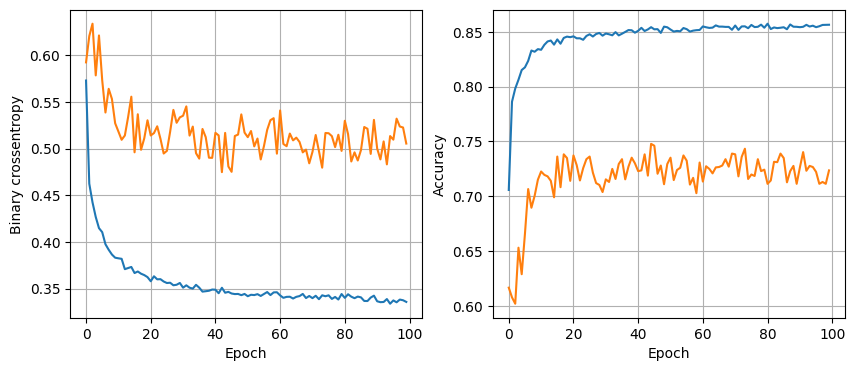

119/119 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8691
Nodes: 16, dropout: 0.2, learning rate: 0.001, batch size: 64, epochs: 100 


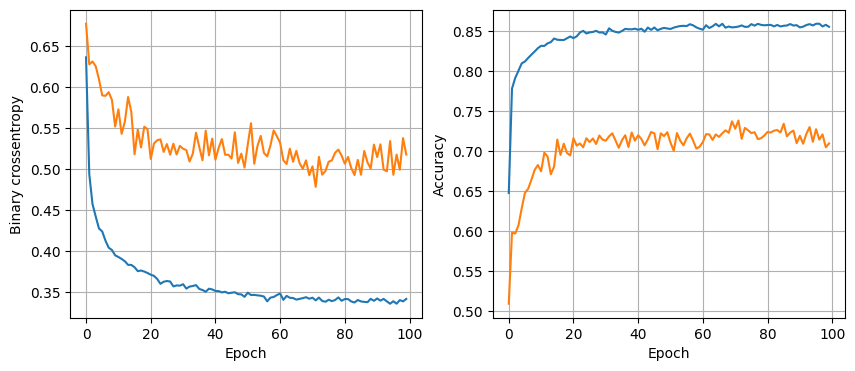

119/119 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8633
Nodes: 16, dropout: 0.2, learning rate: 0.001, batch size: 128, epochs: 100 


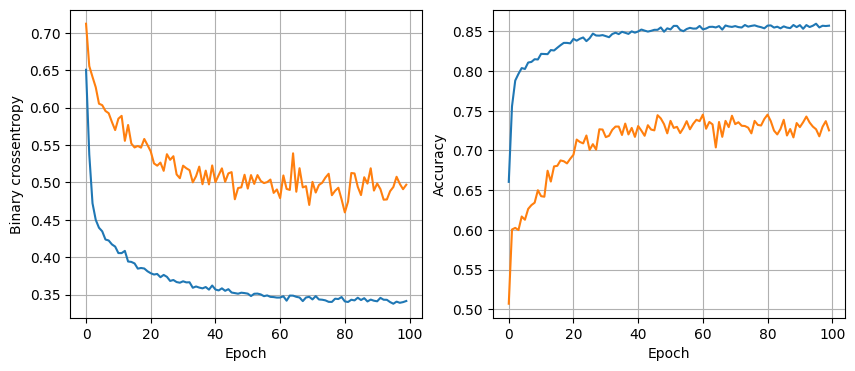

119/119 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8659
Nodes: 32, dropout: 0, learning rate: 0.01, batch size: 32, epochs: 100 


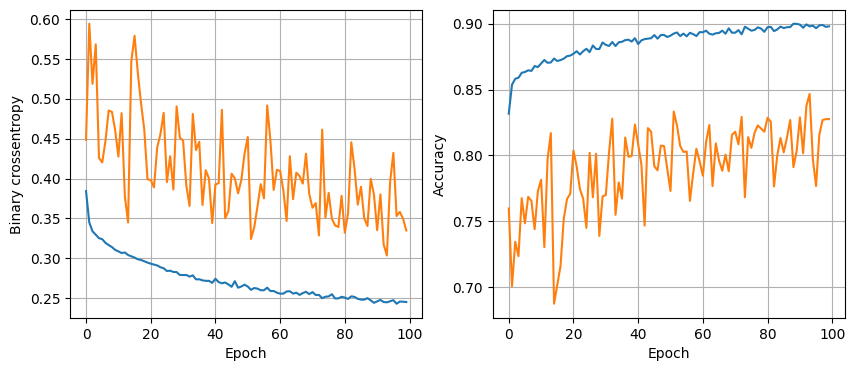

119/119 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8591
Nodes: 32, dropout: 0, learning rate: 0.01, batch size: 64, epochs: 100 


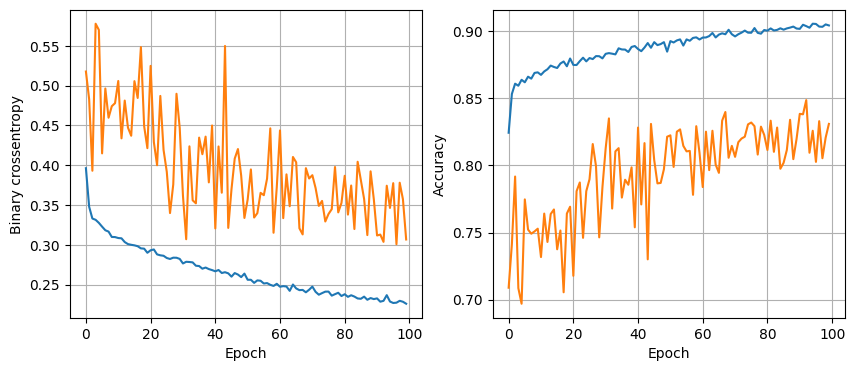

119/119 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8678
Nodes: 32, dropout: 0, learning rate: 0.01, batch size: 128, epochs: 100 


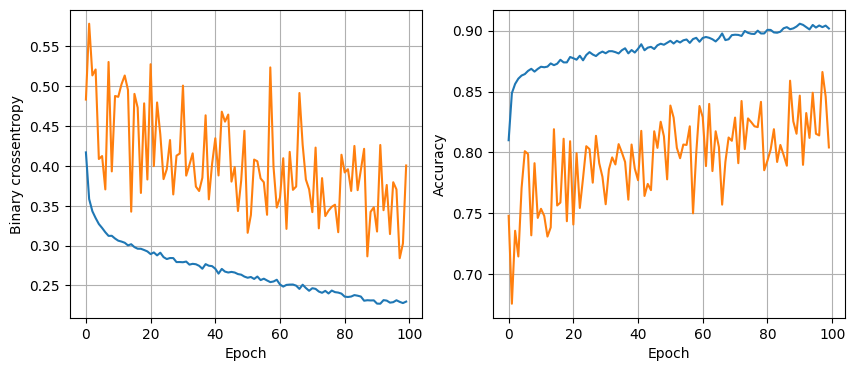

119/119 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8580
Nodes: 32, dropout: 0, learning rate: 0.005, batch size: 32, epochs: 100 


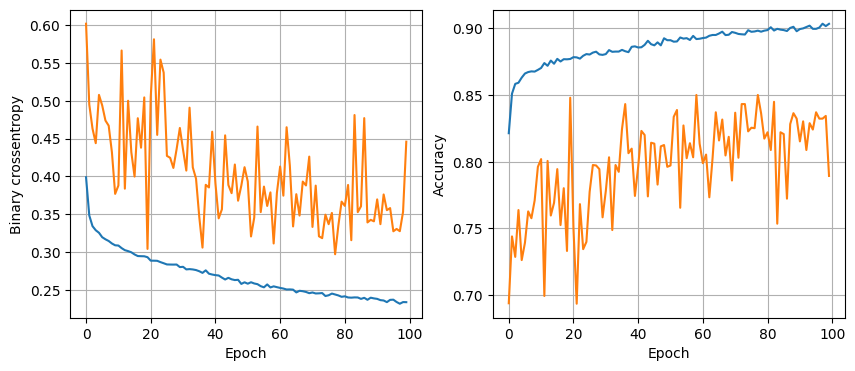

119/119 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8659
Nodes: 32, dropout: 0, learning rate: 0.005, batch size: 64, epochs: 100 


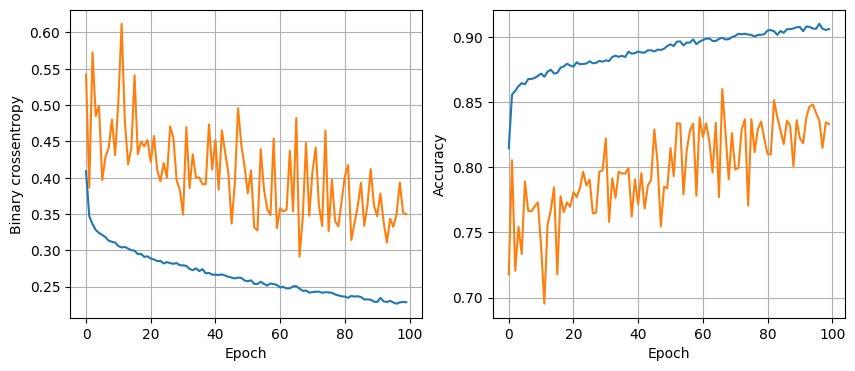

119/119 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8696
Nodes: 32, dropout: 0, learning rate: 0.005, batch size: 128, epochs: 100 


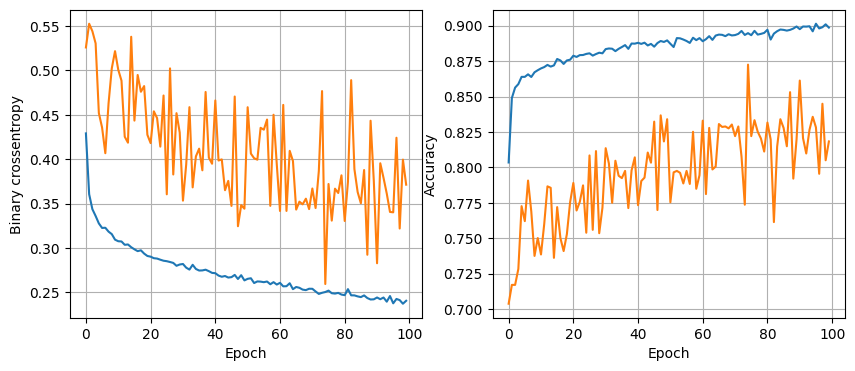

119/119 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.8736
Nodes: 32, dropout: 0, learning rate: 0.001, batch size: 32, epochs: 100 


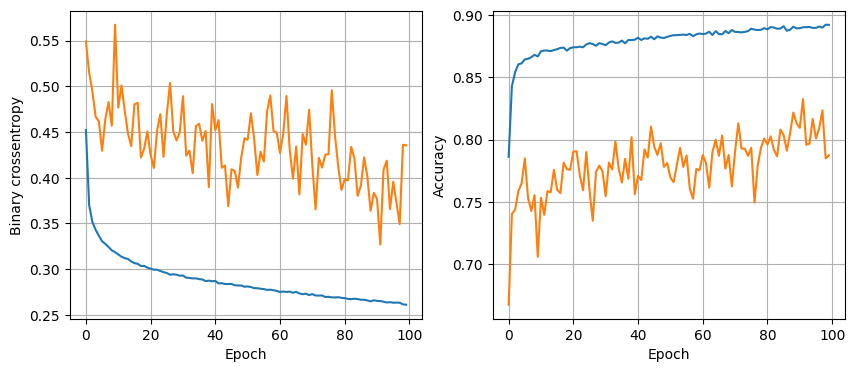

119/119 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8743
Nodes: 32, dropout: 0, learning rate: 0.001, batch size: 64, epochs: 100 


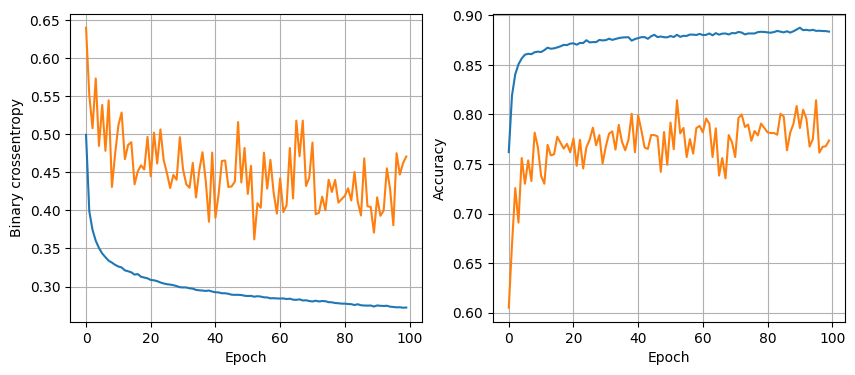

119/119 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8701
Nodes: 32, dropout: 0, learning rate: 0.001, batch size: 128, epochs: 100 


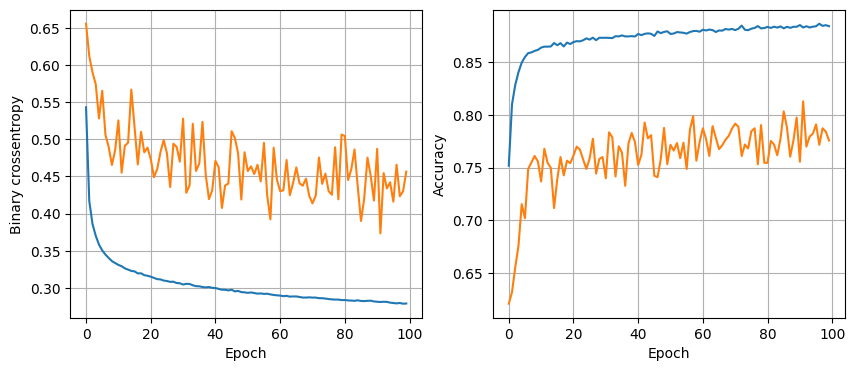

119/119 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8667
Nodes: 32, dropout: 0.2, learning rate: 0.01, batch size: 32, epochs: 100 


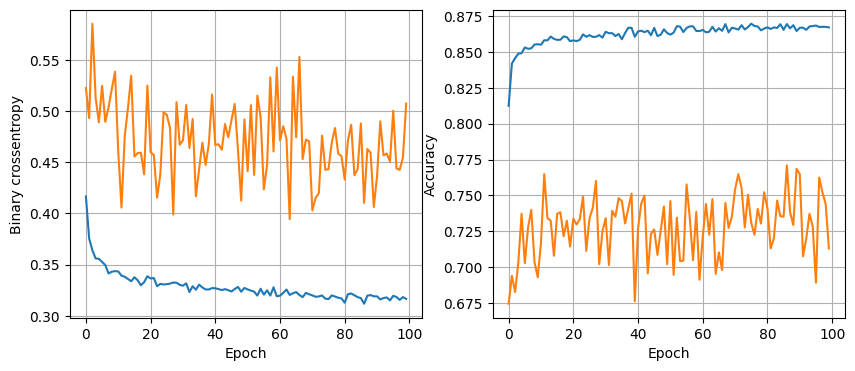

119/119 [==============================] - 0s 1ms/step - loss: 0.3042 - accuracy: 0.8686
Nodes: 32, dropout: 0.2, learning rate: 0.01, batch size: 64, epochs: 100 


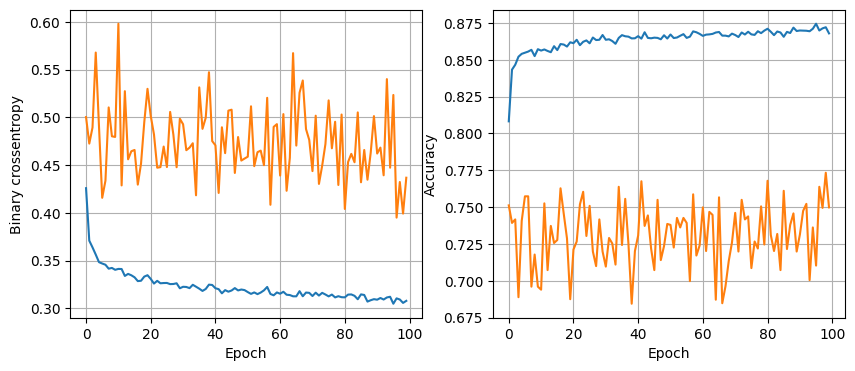

119/119 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8657
Nodes: 32, dropout: 0.2, learning rate: 0.01, batch size: 128, epochs: 100 


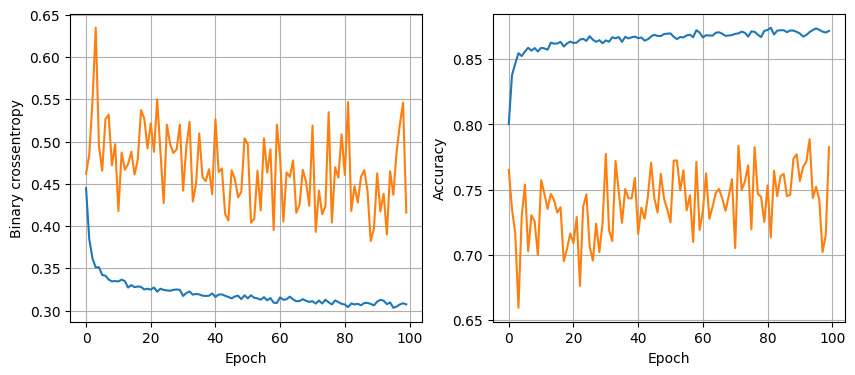

119/119 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8762
Nodes: 32, dropout: 0.2, learning rate: 0.005, batch size: 32, epochs: 100 


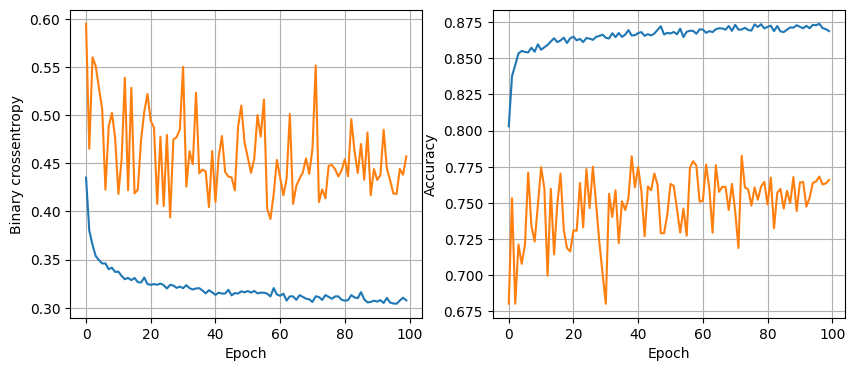

119/119 [==============================] - 0s 1ms/step - loss: 0.2969 - accuracy: 0.8764
Nodes: 32, dropout: 0.2, learning rate: 0.005, batch size: 64, epochs: 100 


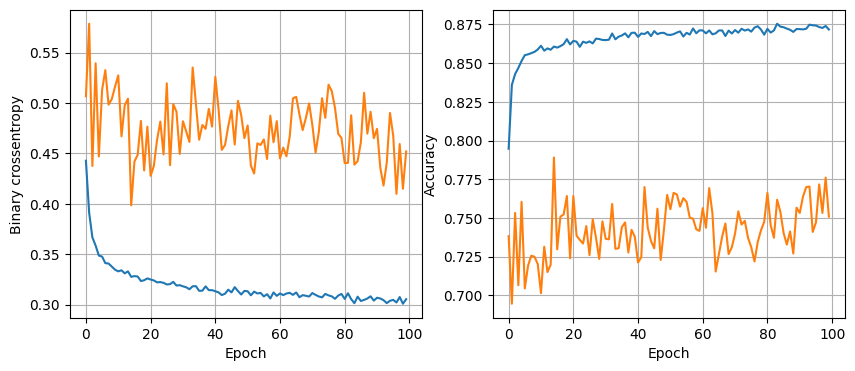

119/119 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8754
Nodes: 32, dropout: 0.2, learning rate: 0.005, batch size: 128, epochs: 100 


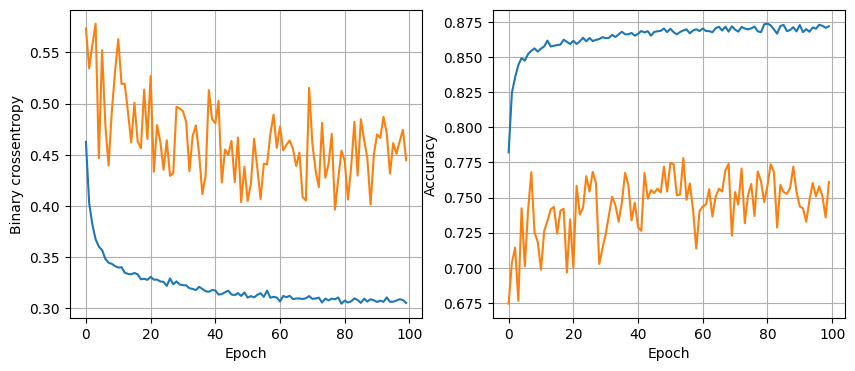

119/119 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8730
Nodes: 32, dropout: 0.2, learning rate: 0.001, batch size: 32, epochs: 100 


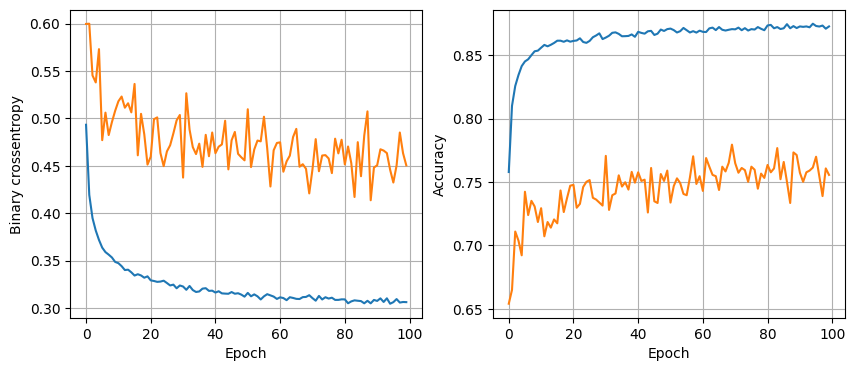

119/119 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8764
Nodes: 32, dropout: 0.2, learning rate: 0.001, batch size: 64, epochs: 100 


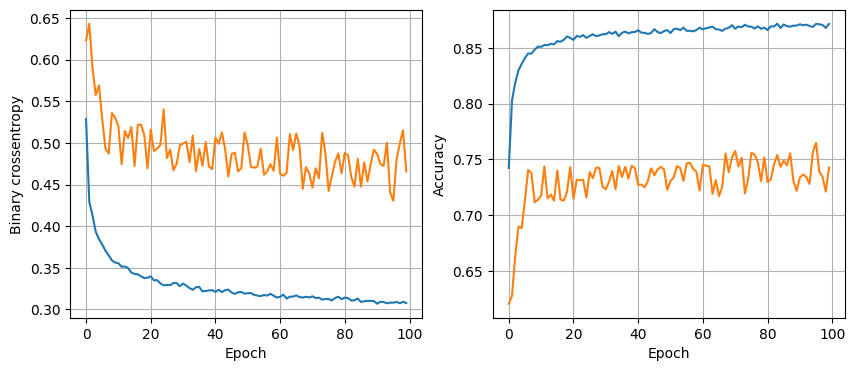

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8704
Nodes: 32, dropout: 0.2, learning rate: 0.001, batch size: 128, epochs: 100 


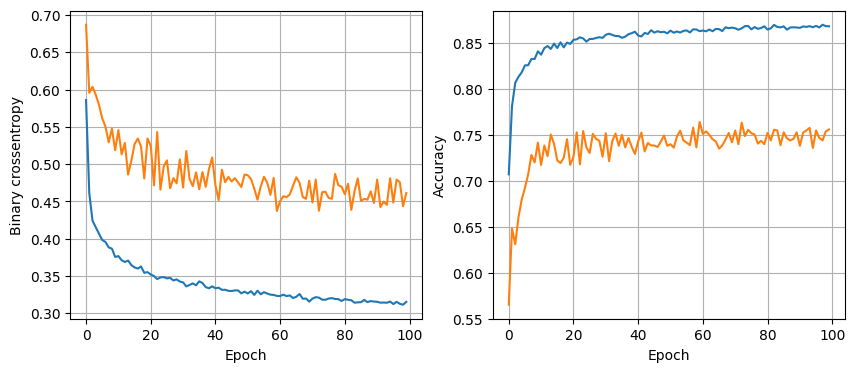

119/119 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8736
Nodes: 64, dropout: 0, learning rate: 0.01, batch size: 32, epochs: 100 


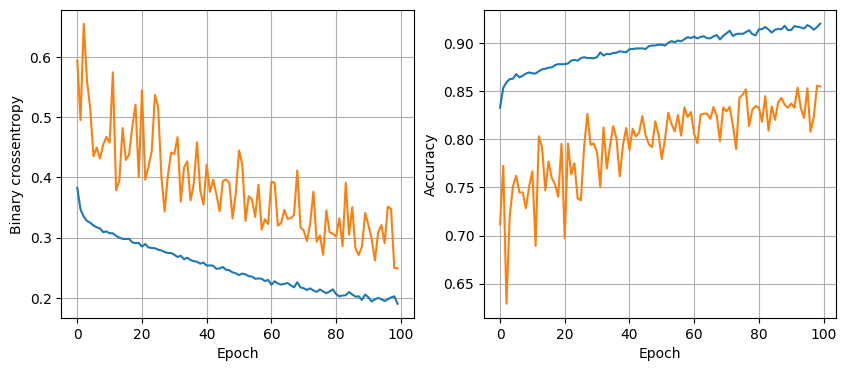

119/119 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.8541
Nodes: 64, dropout: 0, learning rate: 0.01, batch size: 64, epochs: 100 


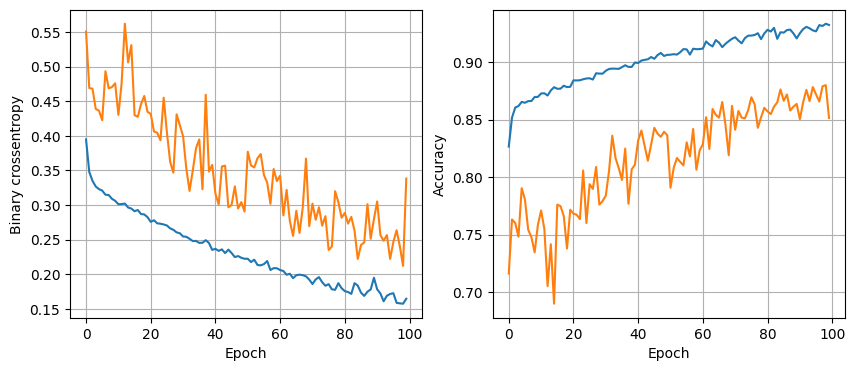

119/119 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.8467
Nodes: 64, dropout: 0, learning rate: 0.01, batch size: 128, epochs: 100 


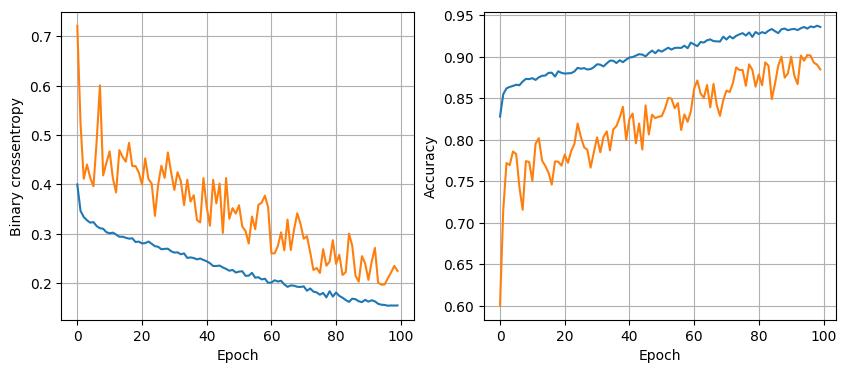

119/119 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.8599
Nodes: 64, dropout: 0, learning rate: 0.005, batch size: 32, epochs: 100 


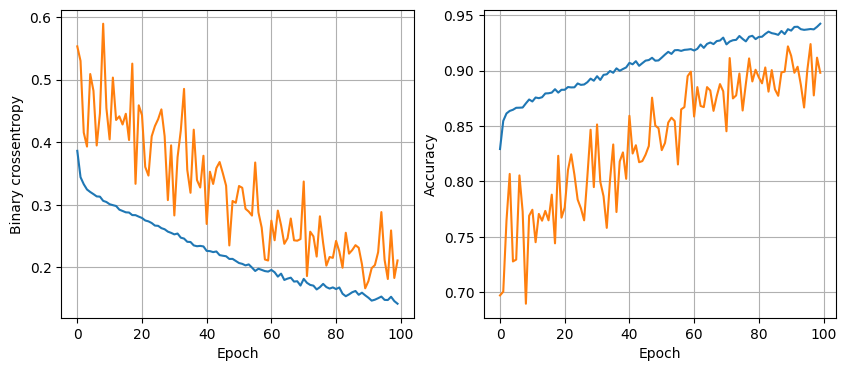

119/119 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.8462
Nodes: 64, dropout: 0, learning rate: 0.005, batch size: 64, epochs: 100 


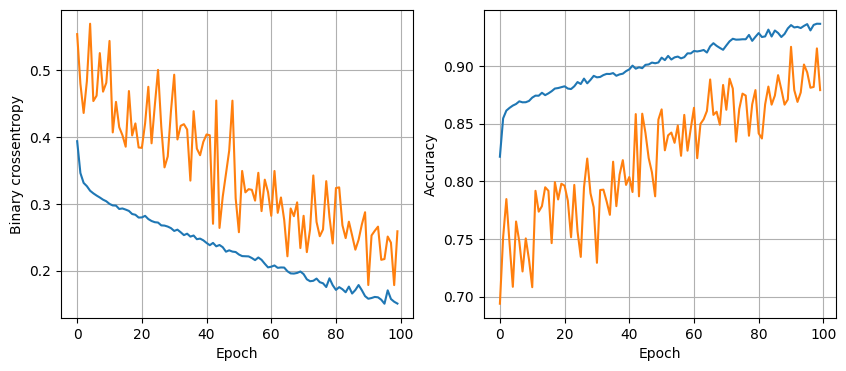

119/119 [==============================] - 0s 1ms/step - loss: 0.5325 - accuracy: 0.8557
Nodes: 64, dropout: 0, learning rate: 0.005, batch size: 128, epochs: 100 


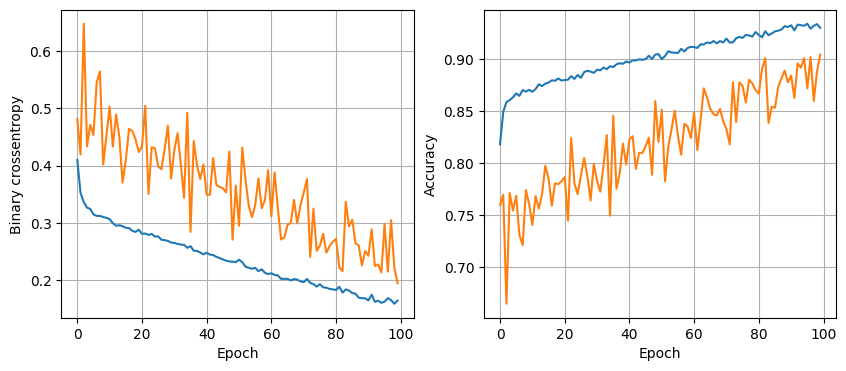

119/119 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.8525
Nodes: 64, dropout: 0, learning rate: 0.001, batch size: 32, epochs: 100 


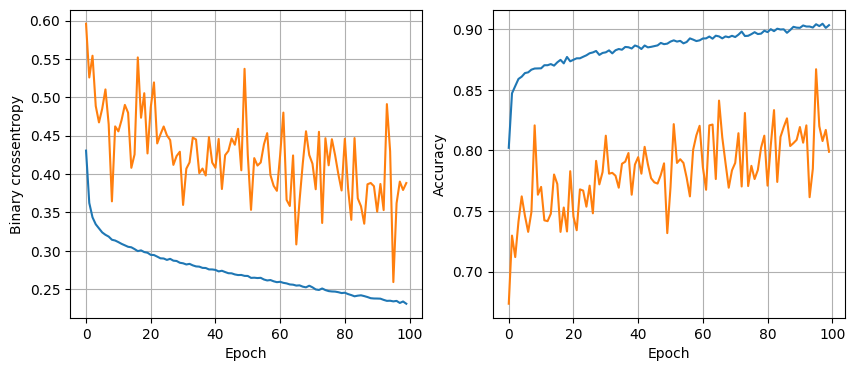

119/119 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8617
Nodes: 64, dropout: 0, learning rate: 0.001, batch size: 64, epochs: 100 


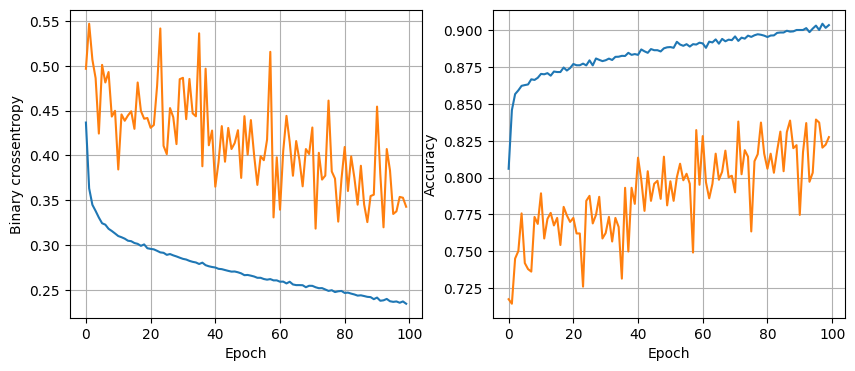

119/119 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8599
Nodes: 64, dropout: 0, learning rate: 0.001, batch size: 128, epochs: 100 


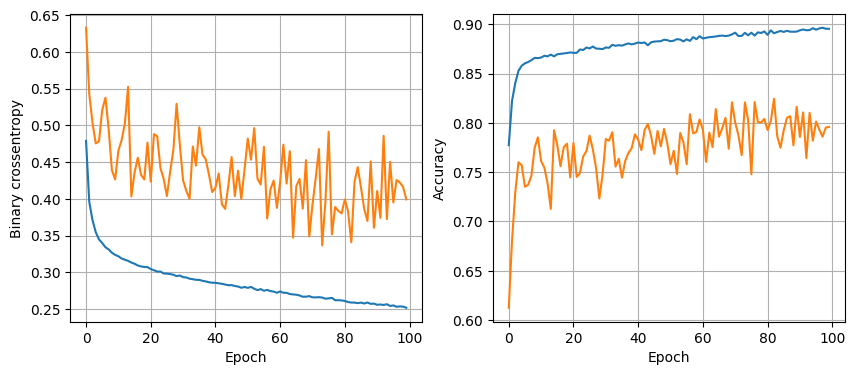

119/119 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8730
Nodes: 64, dropout: 0.2, learning rate: 0.01, batch size: 32, epochs: 100 


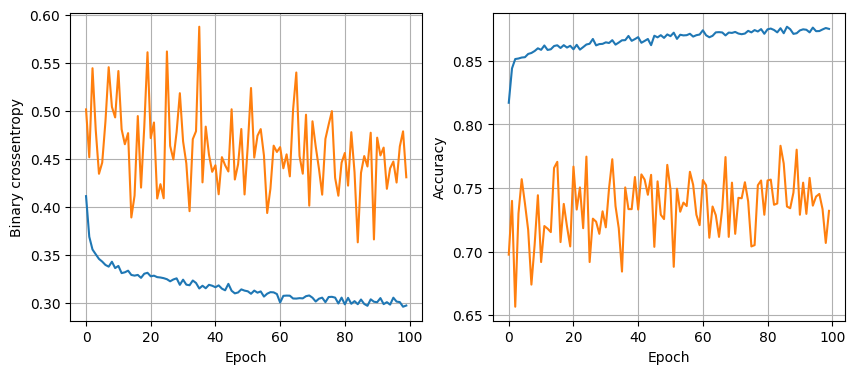

119/119 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8717
Nodes: 64, dropout: 0.2, learning rate: 0.01, batch size: 64, epochs: 100 


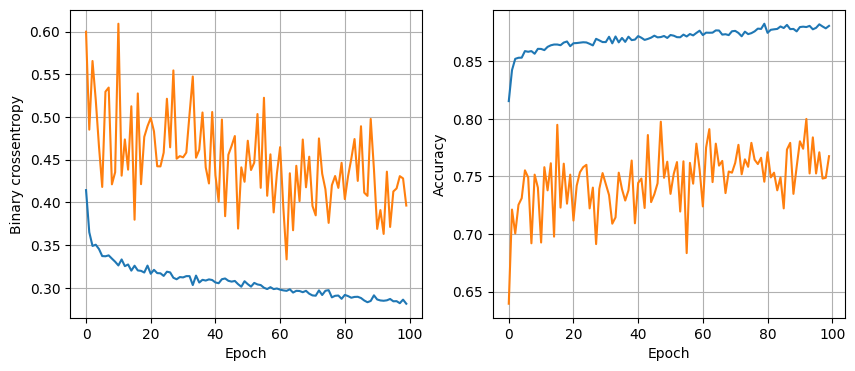

119/119 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8717
Nodes: 64, dropout: 0.2, learning rate: 0.01, batch size: 128, epochs: 100 


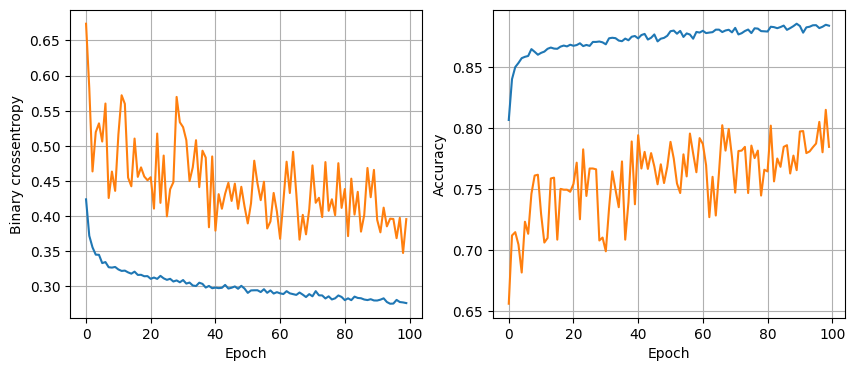

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8712
Nodes: 64, dropout: 0.2, learning rate: 0.005, batch size: 32, epochs: 100 


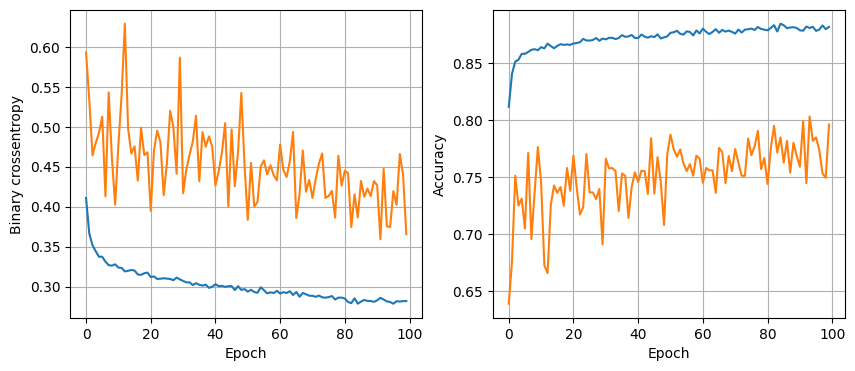

119/119 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8741
Nodes: 64, dropout: 0.2, learning rate: 0.005, batch size: 64, epochs: 100 


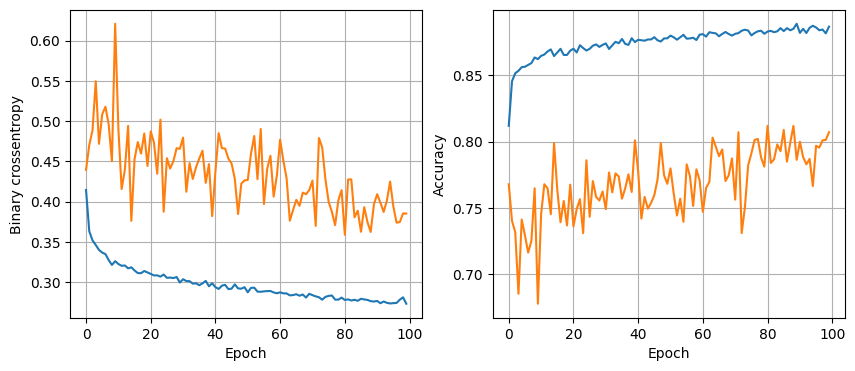

119/119 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8751
Nodes: 64, dropout: 0.2, learning rate: 0.005, batch size: 128, epochs: 100 


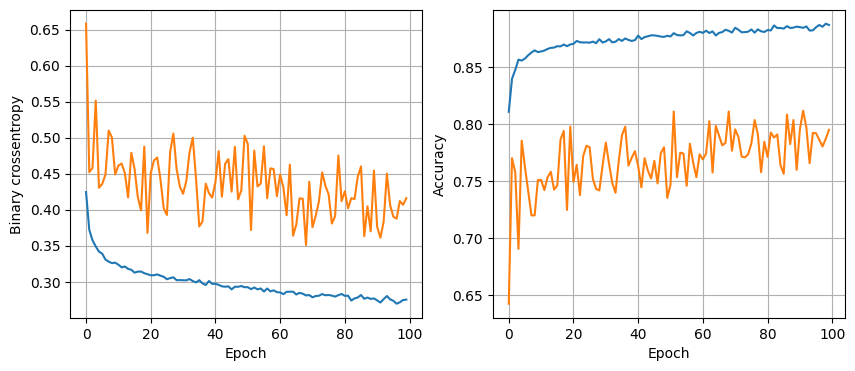

119/119 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8772
Nodes: 64, dropout: 0.2, learning rate: 0.001, batch size: 32, epochs: 100 


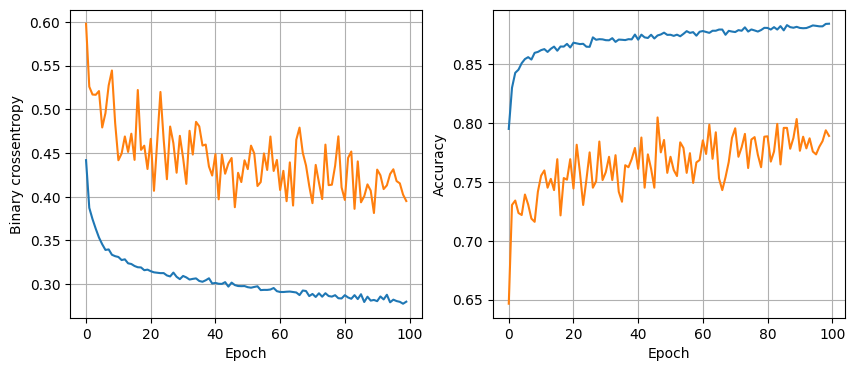

119/119 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8751
Nodes: 64, dropout: 0.2, learning rate: 0.001, batch size: 64, epochs: 100 


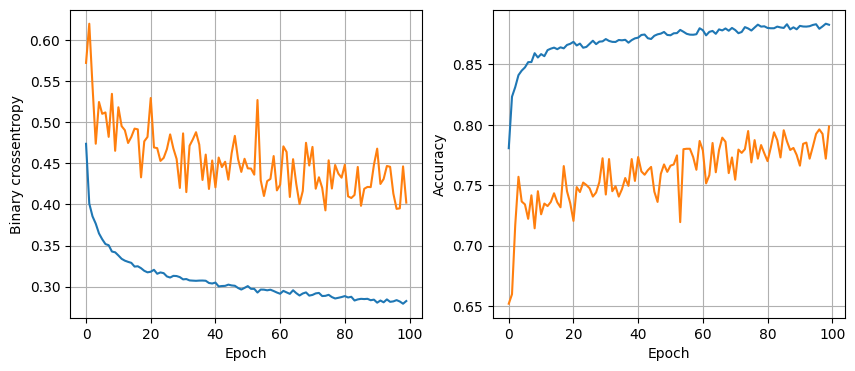

119/119 [==============================] - 0s 1ms/step - loss: 0.2975 - accuracy: 0.8764
Nodes: 64, dropout: 0.2, learning rate: 0.001, batch size: 128, epochs: 100 


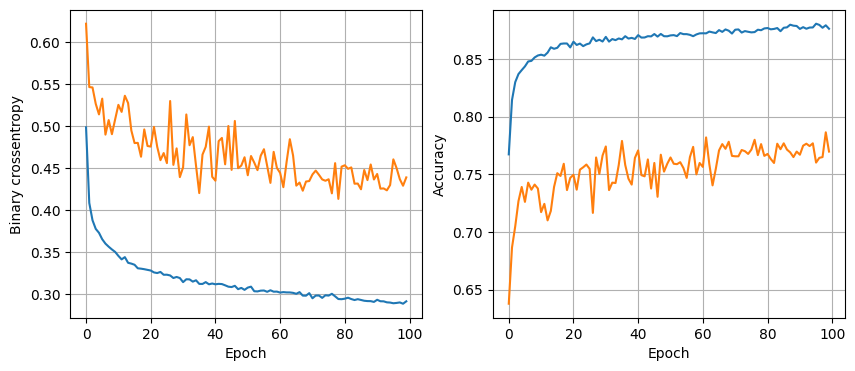

119/119 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.8741


In [37]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32,64, 128]:
                print(f"Nodes: {num_nodes}, dropout: {dropout_prob}, learning rate: {lr}, batch size: {batch_size}, epochs: {epochs} ")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [42]:
y_prediction = least_loss_model.predict(X_test)
y_prediction = (y_prediction > 0.5).astype(int).reshape(-1,)
y_prediction

119/119 [==============================] - 0s 1ms/step


array([1, 0, 0, ..., 1, 1, 0])

In [43]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1295
           1       0.88      0.94      0.91      2509

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

